### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

## 1. 기본 그래프(basic plot)

막대(bar), 선(line), 산포도(산점도, scatter plot), 히스토그램, 상자(box)

### (1) 질적 데이터

+ 요약방법 : 도표
+ 정리방법 : 도수 분포표, 분할표
+ 그래프 : 막대, 원, ...


### (2) 양적 데이터

+ 요약방법 : 수치
+ 정리방법 : 산술평균, 중앙값, ..
+ 그래프 : 히스토그램, 선(시계열 데이터), 산포도, Boxplot, ...

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 2. 선 그래프

0     0.334436
10    0.770667
20   -0.208299
30    2.692606
40   -0.947558
50   -0.262491
60    1.760669
70    1.234431
80   -0.029354
90   -1.129733
dtype: float64


<AxesSubplot:>

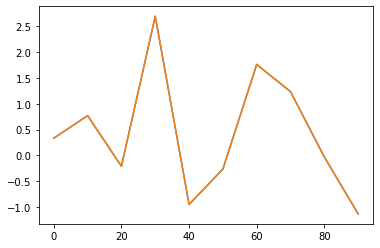

In [7]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
print(s)

s.plot()
s.plot.line()

<AxesSubplot:>

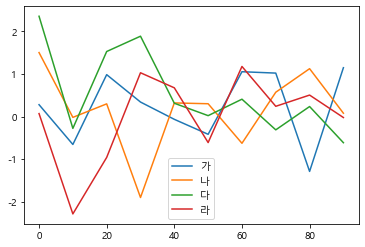

In [15]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0, 100, 10))
df.plot()

## 3. 막대 그래프

<AxesSubplot:>

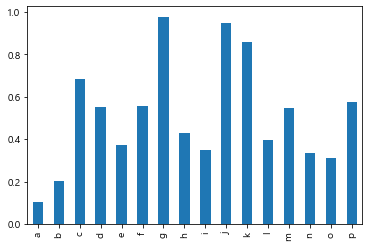

In [20]:
s = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s

s.plot(kind="bar")
s.plot.bar()

<AxesSubplot:>

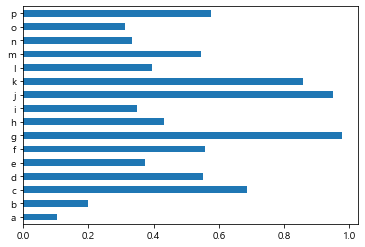

In [23]:
# 가로로 보기
s.plot(kind="barh")
s.plot.barh()

<AxesSubplot:>

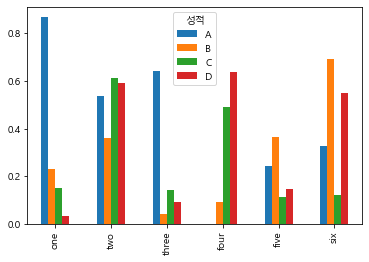

In [29]:
df = pd.DataFrame(np.random.rand(6,4), index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="성적"))
df.plot(kind="bar")

<AxesSubplot:>

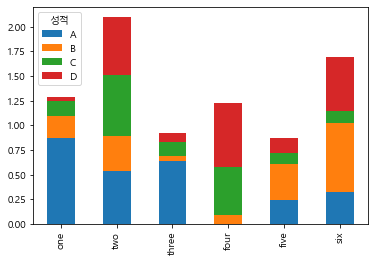

In [32]:
df.plot(kind="bar", stacked=True)

<AxesSubplot:>

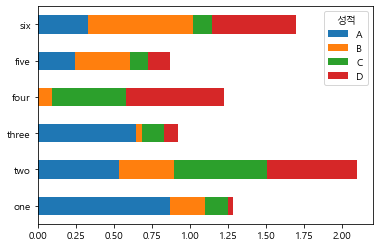

In [33]:
df.plot(kind="barh", stacked=True)